In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
#%config InlineBackend.figure_format = 'svg'
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from pylab import rcParams
rcParams['figure.figsize'] = 12, 9
import math
import warnings
warnings.filterwarnings('ignore')

Импортируем необходимые данные

In [11]:
data = pd.read_csv('train.csv')

In [12]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


Проверяем данные

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.4+ MB


#### Пройдемся по каждому признаку

ID не нужен, можно удалить

In [14]:
data = data.drop('Id', axis = 1)

DistrictId все норм

Rooms

In [15]:
data['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [16]:
data.loc[(data['Rooms'] == 10) |
         (data['Rooms'] == 19), 'Rooms'] = 1

In [17]:
data = data.drop(data.loc[(data['Rooms'] == 0)].index, axis=0)

Square

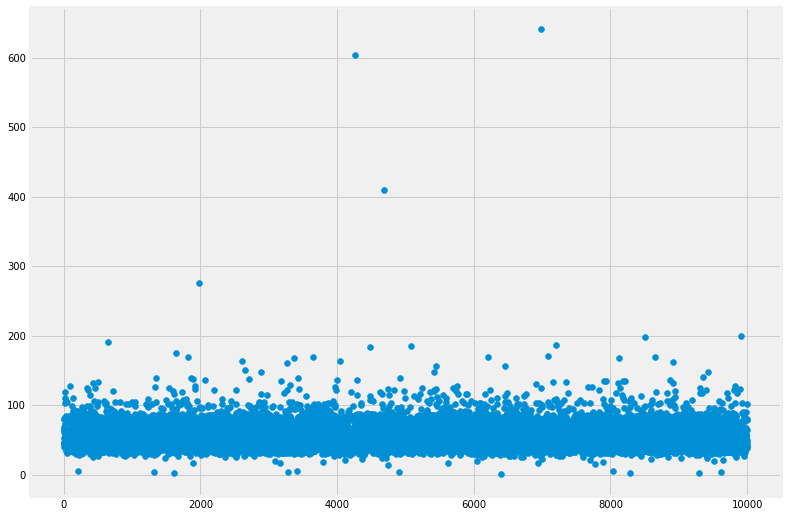

In [18]:
plt.scatter(data.index, data['Square'])

In [19]:
data = data.drop(data.loc[(data['Square'] > 190) | (data['Square'] < 20)].index, axis=0)

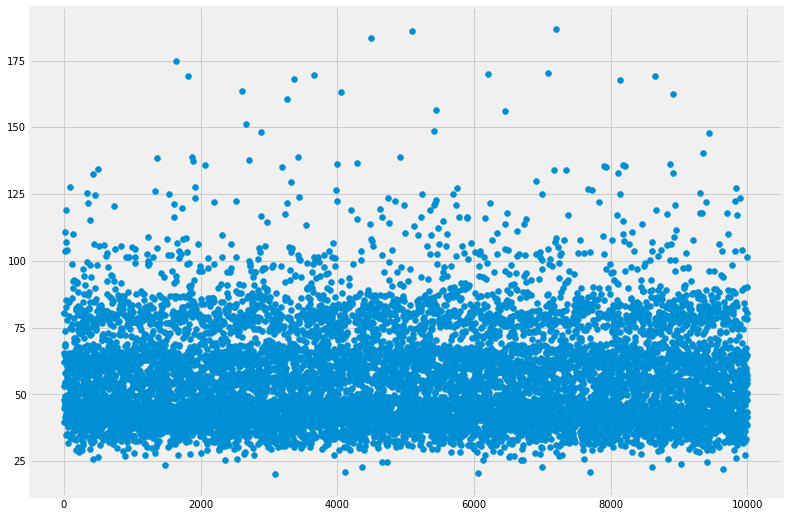

In [20]:
plt.scatter(data.index, data['Square'])

KitchenSquare

In [21]:
data['KitchenSquare'].value_counts()

1.0       2448
8.0       1304
5.0       1169
10.0      1072
6.0       1038
9.0        842
0.0        686
7.0        608
12.0       249
11.0       233
13.0        67
14.0        51
4.0         39
15.0        31
3.0         21
16.0        16
20.0        14
17.0        12
19.0        10
18.0         6
2.0          3
22.0         3
51.0         2
30.0         2
41.0         2
43.0         2
112.0        2
58.0         2
32.0         2
37.0         2
66.0         1
48.0         1
96.0         1
72.0         1
40.0         1
2014.0       1
35.0         1
60.0         1
78.0         1
27.0         1
84.0         1
62.0         1
42.0         1
63.0         1
39.0         1
1970.0       1
36.0         1
75.0         1
21.0         1
29.0         1
23.0         1
73.0         1
123.0        1
54.0         1
31.0         1
53.0         1
25.0         1
Name: KitchenSquare, dtype: int64

In [22]:
data.loc[data['KitchenSquare'] >  1000, 'KitchenSquare'] = 10

Floor

In [23]:
data['Floor'].value_counts()

4     944
5     873
3     869
6     801
7     756
8     642
9     603
2     585
10    552
11    457
12    437
13    397
14    362
16    289
15    287
17    255
1     230
18    184
19    121
20     67
21     58
22     54
24     52
25     34
23     25
26     18
27      5
28      2
32      2
42      1
33      1
37      1
31      1
Name: Floor, dtype: int64

HouseFloor

In [24]:
data['HouseFloor'].value_counts()

17.0     2329
9.0      1389
12.0     1073
5.0      1024
14.0      625
16.0      575
1.0       492
25.0      373
22.0      342
0.0       265
24.0      176
8.0       141
10.0      135
4.0       132
3.0       124
15.0      122
19.0      106
20.0      104
18.0       88
7.0        59
6.0        58
2.0        46
23.0       40
21.0       33
11.0       28
13.0       27
30.0       21
40.0        7
27.0        6
32.0        4
37.0        3
28.0        3
48.0        2
99.0        2
39.0        2
117.0       1
29.0        1
31.0        1
38.0        1
44.0        1
36.0        1
26.0        1
45.0        1
47.0        1
Name: HouseFloor, dtype: int64

Найдем среднее значение высотности дома по годам

In [25]:
uniq_HY_arr = data.loc[(data['HouseFloor'] < data['Floor']), 'HouseYear'].unique()

In [26]:
d = {}
for i in uniq_HY_arr:
    spum = data.loc[(data['HouseYear'] == i) & 
             (data['HouseFloor'] > 2), 'HouseFloor'].mean()
    #print(f'For {i} year {math.ceil(spum)} is average HouseFloor')
    d[i] = math.ceil(spum)
av_HF_year = pd.Series(d)

Найдем года домов с нулевой этажностью и заменим на среднее по этому году

In [27]:
for i in av_HF_year.index:
    data.loc[(data['HouseFloor'] == 0) & (data['HouseYear'] == i), 'HouseFloor'] = av_HF_year[i]

Найдем дома где этажность дома ниже этажа квартиры и заменим этажность дома на этаж квартиры

In [28]:
data.loc[data['HouseFloor'] < data['Floor'],'HouseFloor'] = data.loc[data['HouseFloor'] < data['Floor'],'Floor']

In [29]:
data.loc[data['HouseFloor'] > 40,'HouseFloor'] = data.loc[data['HouseFloor'] > 40,'Floor']

HouseYear

In [30]:
data['HouseYear'].value_counts()

1977        2638
2017         308
2016         302
2015         298
2014         209
1970         193
1969         190
1972         178
1971         177
2018         175
1974         169
1968         162
1965         160
1963         158
1976         155
1973         150
1964         150
1975         150
1967         145
1966         140
1978         129
1962         123
1960         120
1961         112
1982         109
1981         108
1979         107
1980         107
2005         102
1983         101
            ... 
1953          10
1952          10
1931           7
1950           7
1935           7
1939           6
1918           5
1933           5
1937           5
1934           4
1938           4
1951           4
1940           4
1930           3
1942           3
1936           3
1919           3
1917           3
1912           2
1929           2
1932           2
1948           2
1941           2
4968           1
1914           1
1947           1
1916           1
1910          

In [31]:
data.loc[data['HouseYear'] == 20052011, 'HouseYear'] = 2011

In [32]:
data.loc[data['HouseYear'] > 2091, 'HouseYear'] = 1977

 Ecology_1

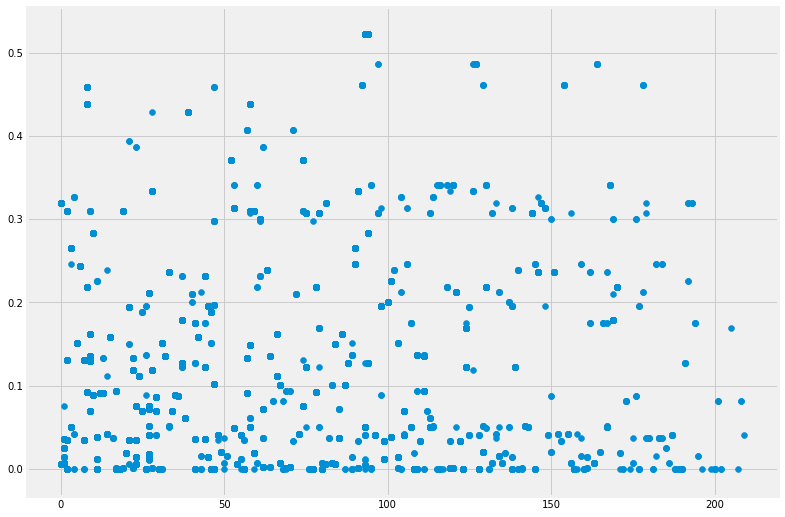

In [33]:
plt.scatter(data['DistrictId'], data['Ecology_1'])

Ecology_2

In [34]:
data['Ecology_2'].value_counts()

B    9869
A      96
Name: Ecology_2, dtype: int64

In [35]:
data.loc[data['Ecology_2'] == 'A', 'Ecology_2'] = 0
data.loc[data['Ecology_2'] == 'B', 'Ecology_2'] = 1

Ecology_3

In [36]:
data['Ecology_3'].value_counts()

B    9691
A     274
Name: Ecology_3, dtype: int64

In [37]:
data.loc[data['Ecology_3'] == 'A', 'Ecology_3'] = 0
data.loc[data['Ecology_3'] == 'B', 'Ecology_3'] = 1

Social_1

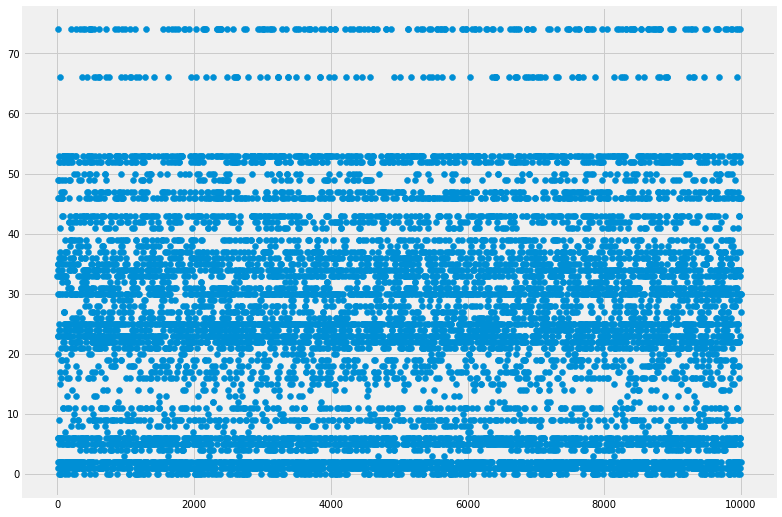

In [38]:
plt.scatter(data.index, data['Social_1'])

Social_2

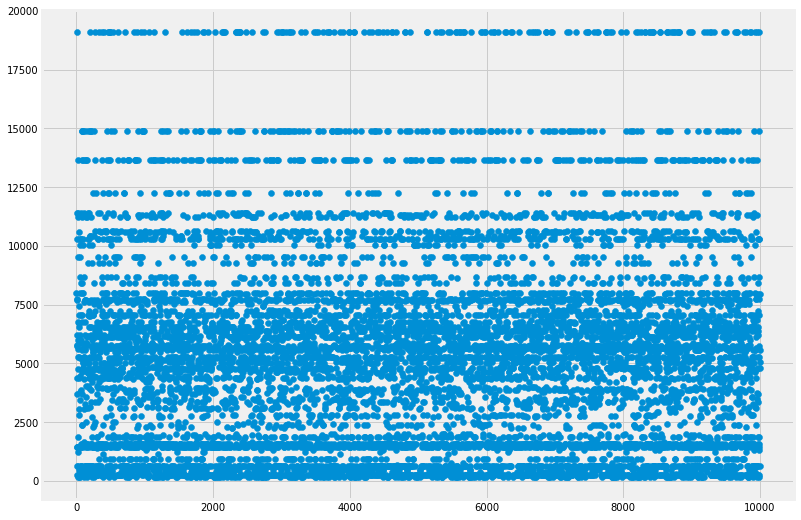

In [39]:
plt.scatter(data.index, data['Social_2'])

Social_3

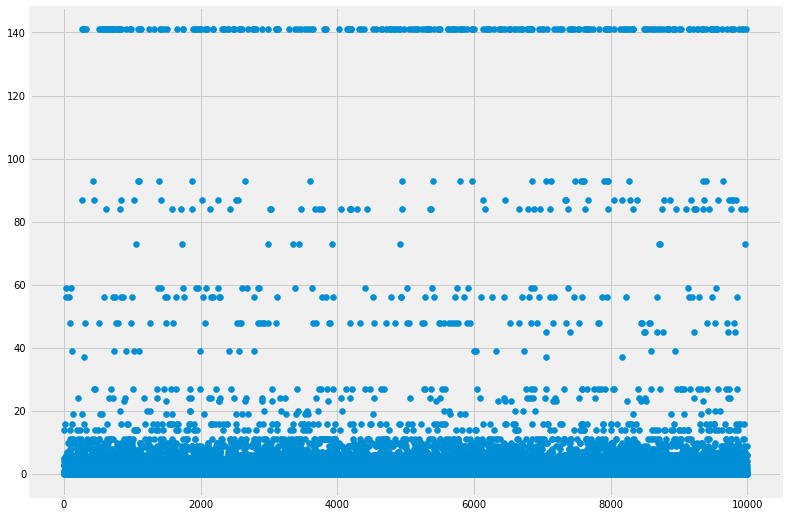

In [40]:
plt.scatter(data.index, data['Social_3'])

Helthcare_2

In [41]:
data['Helthcare_2'].value_counts()

0    4199
1    2179
3    1660
2    1156
5     385
4     287
6      99
Name: Helthcare_2, dtype: int64

Shops_1

In [42]:
data['Shops_1'].value_counts()

0     2308
5     1321
1     1318
2      962
4      838
3      711
6      485
11     400
9      313
7      292
8      250
23     244
10     215
15     176
16      83
19      49
Name: Shops_1, dtype: int64

Shops_2

In [43]:
data['Shops_2'].value_counts()

B    9142
A     823
Name: Shops_2, dtype: int64

In [44]:
data.loc[data['Shops_2'] == 'A', 'Shops_2'] = 0
data.loc[data['Shops_2'] == 'B', 'Shops_2'] = 1

Price

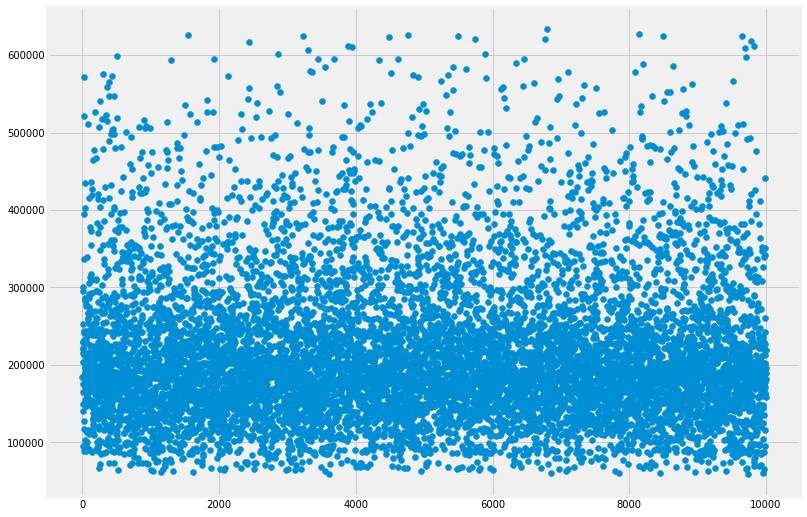

In [45]:
plt.scatter(data.index, data['Price'])

Healthcare_1

Применим ML для заполения пробелов

In [46]:
data_for_HC = data.copy()

Логично предположить что на уровень здравохранения влияют параметры района

In [47]:
features_for_HC = ('DistrictId', 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1',
                   'Social_2','Social_3','Healthcare_1','Helthcare_2','Shops_1', 'Shops_2')

In [48]:
data_for_HC = data_for_HC.loc[:,features_for_HC]

Разобьем таблицу на 2 : train, test

In [49]:
test_HC = data_for_HC.loc[data_for_HC['Healthcare_1'].isnull()].drop('Healthcare_1' ,axis=1)
test_HC.shape

(4779, 10)

In [50]:
train_HC = data_for_HC.loc[data_for_HC['Healthcare_1'].notnull()]

In [51]:
target_HC = train_HC['Healthcare_1']

In [52]:
train_HC = train_HC.drop('Healthcare_1' ,axis=1)

Данные готовы, подготавливаем их для обучения

In [53]:
X_train, X_test, y_train, y_test  = train_test_split(train_HC, target_HC, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3630, 10), (1556, 10), (3630,), (1556,))

In [54]:
scaler = RobustScaler()

In [55]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_target_scaled = scaler.transform(test_HC)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=train_HC.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=train_HC.columns)

In [56]:
rfr = RandomForestRegressor(n_estimators=1000, max_depth=13, random_state=100)

In [57]:
X_train_scaled.shape, y_train.shape

((3630, 10), (3630,))

In [58]:
rfr.fit(X_train_scaled, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=100, verbose=0, warm_start=False)

In [59]:
y_pred = rfr.predict(X_test_scaled)

In [60]:
r2_score(y_test, y_pred)

0.9993608063824883

ГДЕ ПЕРЕОБУЧЕНИЕ????? НИПОНЯТНА

In [61]:
y_target = rfr.predict(X_target_scaled)

In [62]:
y_target.shape

(4779,)

In [63]:
data.loc[data['Healthcare_1'].isnull(), 'Healthcare_1'] = y_target

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9965 entries, 0 to 9999
Data columns (total 19 columns):
DistrictId       9965 non-null int64
Rooms            9965 non-null float64
Square           9965 non-null float64
LifeSquare       7857 non-null float64
KitchenSquare    9965 non-null float64
Floor            9965 non-null int64
HouseFloor       9965 non-null float64
HouseYear        9965 non-null int64
Ecology_1        9965 non-null float64
Ecology_2        9965 non-null int64
Ecology_3        9965 non-null int64
Social_1         9965 non-null int64
Social_2         9965 non-null int64
Social_3         9965 non-null int64
Healthcare_1     9965 non-null float64
Helthcare_2      9965 non-null int64
Shops_1          9965 non-null int64
Shops_2          9965 non-null int64
Price            9965 non-null float64
dtypes: float64(8), int64(11)
memory usage: 1.5 MB


LifeSquare

In [65]:
true_data_for_ls = data.loc[(data['Square'] > data['LifeSquare']) &
                            (data['Square'] < 200) &
                            (data['LifeSquare'] > 10), :]
true_data_for_ls.shape

(7195, 19)

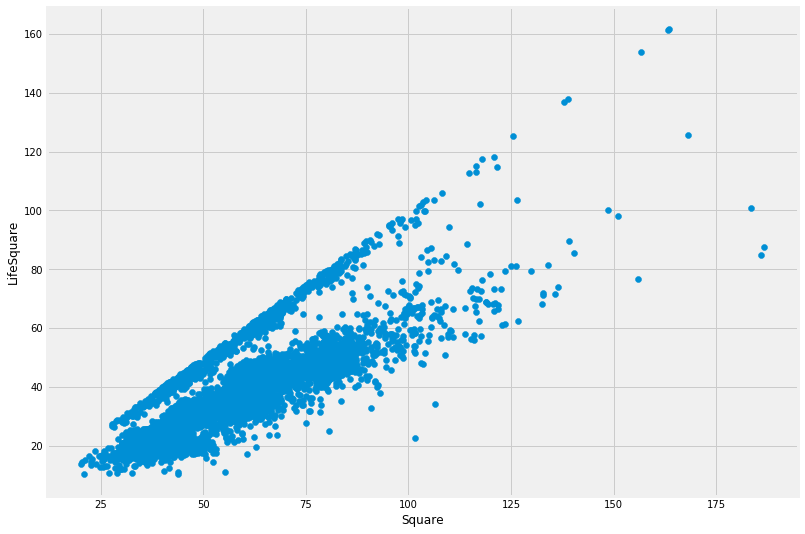

In [66]:
plt.scatter(true_data_for_ls['Square'],true_data_for_ls['LifeSquare'])

plt.xlabel('Square')
plt.ylabel('LifeSquare')

plt.show()

In [67]:
wrong_data = data[data['LifeSquare'].isnull()]
wrong_data.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7,74,2.0,80.312926,NaN,0.0,14,17.0,1977,0.075779,1,1,6,1437,3,1064.290257,0,2,1,221244.156664
8,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,1,1,1,264,0,320.204000,0,1,1,229102.795999
21,27,2.0,64.711835,NaN,1.0,15,15.0,1977,0.211401,1,1,9,1892,0,371.169000,0,1,1,127200.026511
23,54,3.0,118.907612,NaN,0.0,2,17.0,1977,0.006076,1,1,30,5285,0,645.000000,6,6,1,571069.052600
25,74,2.0,82.667915,NaN,1.0,16,17.0,1977,0.075779,1,1,6,1437,3,1064.290257,0,2,1,244145.827069


In [68]:
wrong_data = wrong_data.drop('LifeSquare', axis=1)

In [69]:
target_LS = true_data_for_ls['LifeSquare']

In [70]:
data_LS = true_data_for_ls.drop('LifeSquare', axis=1)

In [71]:
target_LS.shape, data_LS.shape

((7195,), (7195, 18))

In [72]:
features_LS = ('DistrictId', 'Rooms', 'Square', 'KitchenSquare', 'HouseFloor', 'Floor','HouseYear')

In [73]:
X_train, X_test, y_train, y_test  = train_test_split(data_LS, target_LS, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5036, 18), (2159, 18), (5036,), (2159,))

In [74]:
X_train = X_train.loc[:, features_LS]
X_test = X_test.loc[:, features_LS]
X_target = wrong_data.loc[:, features_LS]
X_target.head()

,DistrictId,Rooms,Square,KitchenSquare,HouseFloor,Floor,HouseYear
7,74,2.0,80.312926,0.0,17.0,14,1977
8,1,2.0,64.511437,1.0,17.0,9,1977
21,27,2.0,64.711835,1.0,15.0,15,1977
23,54,3.0,118.907612,0.0,17.0,2,1977
25,74,2.0,82.667915,1.0,17.0,16,1977


In [75]:
scaler_1 = RobustScaler()

In [76]:
X_train_scaled = scaler_1.fit_transform(X_train)
X_test_scaled = scaler_1.transform(X_test)
X_target_scaled = scaler_1.transform(X_target)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=features_LS)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=features_LS)

In [77]:
rfr_1 = RandomForestRegressor(n_estimators=1000, max_depth=13, random_state=42)
rfr_1.fit(X_train_scaled, y_train)
y_pred = rfr_1.predict(X_test_scaled)

In [78]:
r2_score(y_test, y_pred)

0.854834243445821

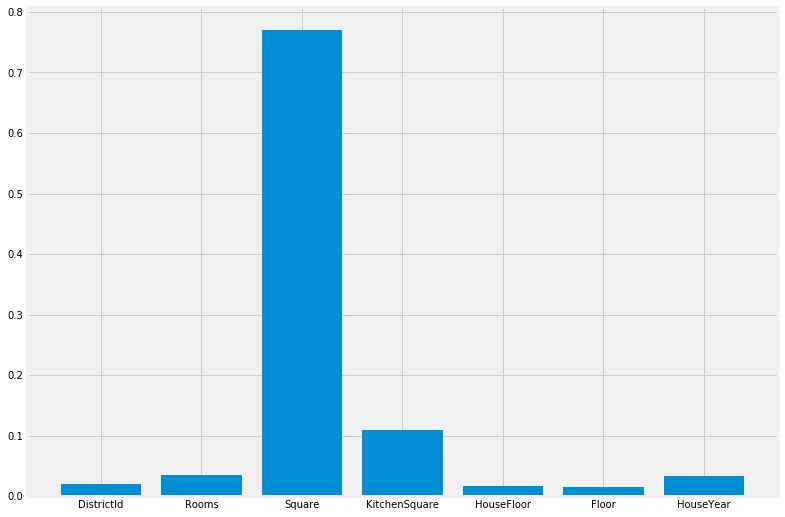

In [79]:
plt.bar(X_train_scaled.columns, rfr_1.feature_importances_)
plt.show()

In [80]:
y_target = rfr_1.predict(X_target_scaled)
y_target

array([75.82218331, 62.34855388, 52.67272186, ..., 52.76455072,
       62.8540865 , 28.27627409])

In [81]:
y_target = pd.Series(y_target , index=X_target.index)
y_target.head()

7      75.822183
8      62.348554
21     52.672722
23    103.041976
25     74.711490
dtype: float64

In [82]:
data['LifeSquare'] = data['LifeSquare'].fillna(y_target)

In [83]:
data.head(10)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,1,1,33,7976,5,895.831221,0,11,1,184966.930730
1,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,1,1,46,10309,1,240.000000,1,16,1,300009.450063
2,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,1,1,34,7759,0,229.000000,1,3,1,220925.908524
3,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,1,1,23,5735,3,1084.000000,0,5,1,175616.227217
4,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,1,1,35,5776,1,2078.000000,2,4,1,150226.531644
5,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,1,1,35,7715,4,990.000000,0,6,1,215898.447742
6,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,1,1,20,4386,14,2308.455150,1,5,1,296021.204377
7,74,2.0,80.312926,75.822183,0.0,14,17.0,1977,0.075779,1,1,6,1437,3,1064.290257,0,2,1,221244.156664
8,1,2.0,64.511437,62.348554,1.0,9,17.0,1977,0.007122,1,1,1,264,0,320.204000,0,1,1,229102.795999
9,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,1,1,6,1437,3,1307.886253,0,2,1,95380.220993


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9965 entries, 0 to 9999
Data columns (total 19 columns):
DistrictId       9965 non-null int64
Rooms            9965 non-null float64
Square           9965 non-null float64
LifeSquare       9965 non-null float64
KitchenSquare    9965 non-null float64
Floor            9965 non-null int64
HouseFloor       9965 non-null float64
HouseYear        9965 non-null int64
Ecology_1        9965 non-null float64
Ecology_2        9965 non-null int64
Ecology_3        9965 non-null int64
Social_1         9965 non-null int64
Social_2         9965 non-null int64
Social_3         9965 non-null int64
Healthcare_1     9965 non-null float64
Helthcare_2      9965 non-null int64
Shops_1          9965 non-null int64
Shops_2          9965 non-null int64
Price            9965 non-null float64
dtypes: float64(8), int64(11)
memory usage: 1.5 MB


Глянем на данны при помощи TSNE

In [85]:
X = data.drop('Price', axis=1)

In [86]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [87]:
scaler_data = RobustScaler()

In [88]:
X = scaler_data.fit_transform(X)

In [89]:
X_tsne = tsne.fit_transform(X)

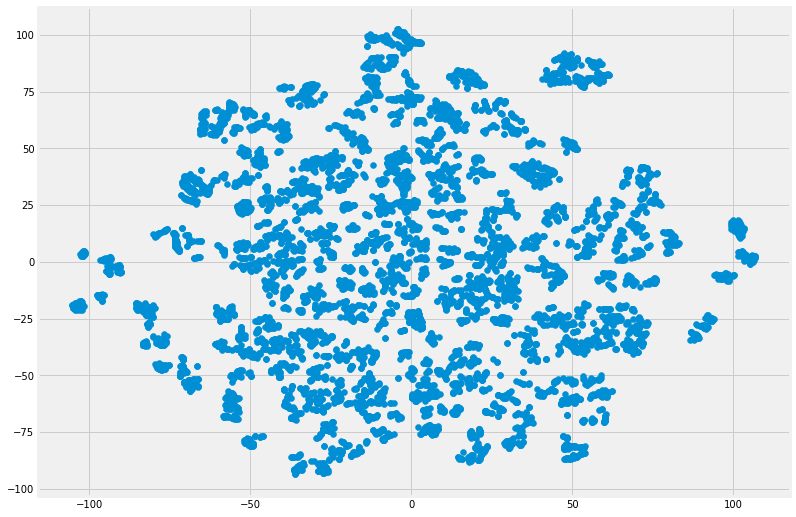

In [90]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

При помощи кластеризации выкинем выпадающие

In [91]:
kmeans_data = KMeans(n_clusters=4, max_iter=100, random_state=2)

In [92]:
data_clust = kmeans_data.fit_predict(X)

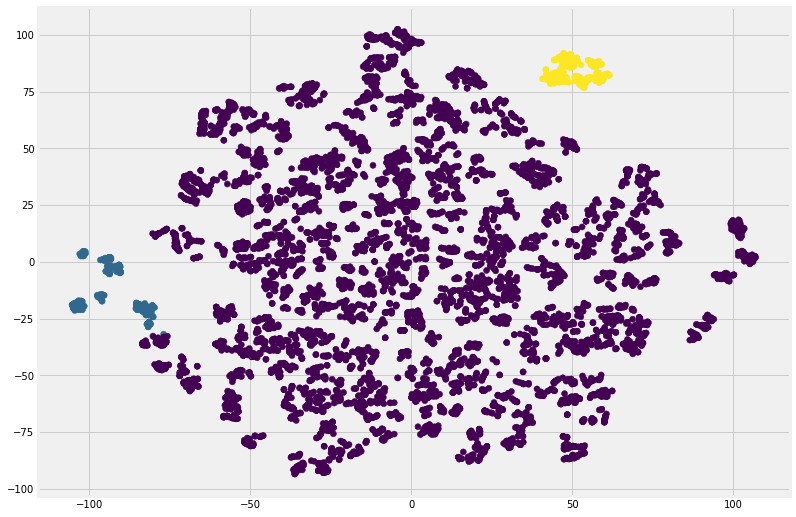

In [93]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data_clust)


In [94]:
data['Cluster'] = data_clust

In [95]:
data['Cluster'].value_counts()

0    9456
1     264
3     244
2       1
Name: Cluster, dtype: int64

In [96]:
data = data.loc[(data['Cluster'] == 0)]

In [97]:
data = data.drop('Cluster',axis=1)

In [98]:
data.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,1,1,33,7976,5,895.831221,0,11,1,184966.930730
1,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,1,1,46,10309,1,240.000000,1,16,1,300009.450063
2,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,1,1,34,7759,0,229.000000,1,3,1,220925.908524
3,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,1,1,23,5735,3,1084.000000,0,5,1,175616.227217
4,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,1,1,35,5776,1,2078.000000,2,4,1,150226.531644


Разберемся с тестовыми данными

In [99]:
data_pred = pd.read_csv('test.csv')

In [100]:
data_pred.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [101]:
data_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 683.6+ KB


---------------------------

In [102]:
data_pred.loc[data_pred['Ecology_3'] == 'A', 'Ecology_3'] = 0
data_pred.loc[data_pred['Ecology_3'] == 'B', 'Ecology_3'] = 1

In [103]:
data_pred.loc[data_pred['Ecology_2'] == 'A', 'Ecology_2'] = 0
data_pred.loc[data_pred['Ecology_2'] == 'B', 'Ecology_2'] = 1

In [104]:
data_pred.loc[data_pred['Shops_2'] == 'A', 'Shops_2'] = 0
data_pred.loc[data_pred['Shops_2'] == 'B', 'Shops_2'] = 1

In [105]:
data_pred['Rooms'].value_counts()

2.0     2030
1.0     1769
3.0     1099
4.0       90
5.0        7
0.0        2
6.0        2
17.0       1
Name: Rooms, dtype: int64

In [106]:
data_pred.loc[data_pred['Rooms'] == 17, :] = 1

In [107]:
data_pred.loc[(data_pred['Rooms'] == 0) & (data_pred['DistrictId'] == 58), :] = 3

In [108]:
data_pred.loc[(data_pred['Rooms'] == 0), :] = 2

-------------------------------

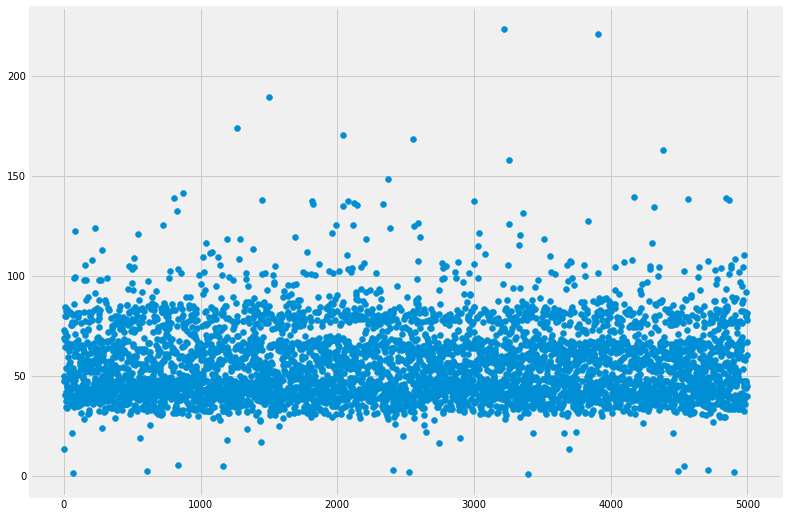

In [109]:
plt.scatter(data_pred.index, data_pred['Square'])

In [110]:
data_pred.loc[(data_pred['Floor'] == 78), :] = 7

In [111]:
for i in av_HF_year.index:
    data_pred.loc[(data_pred['HouseFloor'] == 0) & (data_pred['HouseYear'] == i), 'HouseFloor'] = av_HF_year[i]

In [112]:
data_pred.loc[(data_pred['HouseFloor'] < data_pred['Floor']),'HouseFloor'] = \
    data_pred.loc[(data_pred['HouseFloor'] < data_pred['Floor']),'Floor']

In [113]:
data_pred.loc[(data_pred['HouseFloor'] > 50), 'HouseFloor'] = 18

In [114]:
data_pred.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,1,1,11,2748,1,NaN,0,0,1
1,15856,74,2.0,69.263183,NaN,1.0,6,6.0,1977,0.075779,1,1,6,1437,3,NaN,0,2,1
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,1,1,30,7538,87,4702.0,5,5,1
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,1,1,23,4583,3,NaN,3,3,1
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,1,1,2,629,1,NaN,0,0,0


#### LifeSquare 

In [115]:
data_for_LS_pred = data_pred.copy()

In [116]:
data_for_LS_pred.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,1,1,11,2748,1,NaN,0,0,1
1,15856,74,2.0,69.263183,NaN,1.0,6,6.0,1977,0.075779,1,1,6,1437,3,NaN,0,2,1
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,1,1,30,7538,87,4702.0,5,5,1
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,1,1,23,4583,3,NaN,3,3,1
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,1,1,2,629,1,NaN,0,0,0


In [117]:
features_LS = ('DistrictId', 'Rooms', 'Square','LifeSquare', 'KitchenSquare', 'HouseFloor', 'Floor','HouseYear')

In [118]:
data_for_LS_pred = data_for_LS_pred.loc[:, features_LS]

In [119]:
data_for_LS_pred.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,HouseFloor,Floor,HouseYear
0,58,2.0,49.882643,33.432782,6.0,14.0,6,1972
1,74,2.0,69.263183,NaN,1.0,6.0,6,1977
2,190,1.0,13.597819,15.948246,12.0,5.0,2,1909
3,47,2.0,73.046609,51.940842,9.0,22.0,22,2007
4,27,1.0,47.527111,43.387569,1.0,17.0,17,2017


In [120]:
test_LS = data_for_LS_pred.loc[data_for_LS_pred['LifeSquare'].isnull()].drop('LifeSquare' ,axis=1)

In [121]:
test_LS.head()

,DistrictId,Rooms,Square,KitchenSquare,HouseFloor,Floor,HouseYear
1,74,2.0,69.263183,1.0,6.0,6,1977
5,53,1.0,40.675627,1.0,21.0,21,1977
11,6,3.0,84.625350,1.0,17.0,6,1977
14,27,1.0,37.555197,1.0,5.0,5,1977
21,1,1.0,44.878767,1.0,9.0,1,1977


In [122]:
X_target_scaled = scaler_1.transform(test_LS)

In [123]:
y_target = rfr_1.predict(X_target_scaled)

In [124]:
y_target = pd.Series(y_target , index=test_LS.index)
y_target.head()

1     59.318832
5     36.745969
11    78.729863
14    26.669465
21    41.363088
dtype: float64

In [125]:
data_pred['LifeSquare'] = data_pred['LifeSquare'].fillna(y_target)

In [126]:
data_for_HC_pred = data_pred.copy()

In [127]:
data_for_HC_pred = data_for_HC_pred.loc[:, features_for_HC]

In [128]:
test_HC = data_for_HC_pred.loc[data_for_HC_pred['Healthcare_1'].isnull()].drop('Healthcare_1' ,axis=1)

In [129]:
test_HC.head()

,DistrictId,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
0,58,0.310199,1,1,11,2748,1,0,0,1
1,74,0.075779,1,1,6,1437,3,0,2,1
3,47,0.101872,1,1,23,4583,3,3,3,1
4,27,0.072158,1,1,2,629,1,0,0,0
6,23,0.075779,1,1,6,1437,3,0,2,1


In [130]:
X_target_scaled = scaler.transform(test_HC)

In [131]:
y_target = rfr.predict(X_target_scaled)

In [132]:
data_pred.loc[data_pred['Healthcare_1'].isnull(), 'Healthcare_1'] = y_target

In [133]:
data_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       5000 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null int64
Ecology_3        5000 non-null int64
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     5000 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null int64
dtypes: float64(7), int64(12)
memory usage: 742.2 KB


In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9456 entries, 0 to 9999
Data columns (total 19 columns):
DistrictId       9456 non-null int64
Rooms            9456 non-null float64
Square           9456 non-null float64
LifeSquare       9456 non-null float64
KitchenSquare    9456 non-null float64
Floor            9456 non-null int64
HouseFloor       9456 non-null float64
HouseYear        9456 non-null int64
Ecology_1        9456 non-null float64
Ecology_2        9456 non-null int64
Ecology_3        9456 non-null int64
Social_1         9456 non-null int64
Social_2         9456 non-null int64
Social_3         9456 non-null int64
Healthcare_1     9456 non-null float64
Helthcare_2      9456 non-null int64
Shops_1          9456 non-null int64
Shops_2          9456 non-null int64
Price            9456 non-null float64
dtypes: float64(8), int64(11)
memory usage: 1.4 MB


#### Начнем работу с обучением

Для начала разобьем тренировочный датасет на два

In [135]:
y = data['Price']

In [136]:
X = data.drop('Price', axis=1)

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6619, 18), (2837, 18), (6619,), (2837,))

Отмаштабируем датасеты

In [138]:
scaler_2 = RobustScaler()

In [139]:
X_train_scaled = scaler_2.fit_transform(X_train)
X_test_scaled = scaler_2.transform(X_test)
X_target = scaler_2.transform(data_pred.drop('Id', axis=1))
X_test = scaler_2.transform(X)

In [140]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)
X_target = pd.DataFrame(X_target, columns=X_train.columns)
X_test = pd.DataFrame(X_test, columns=X_train.columns)

Построим визуализацию

In [141]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [142]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [143]:
X_train_tsne.shape

(6619, 2)

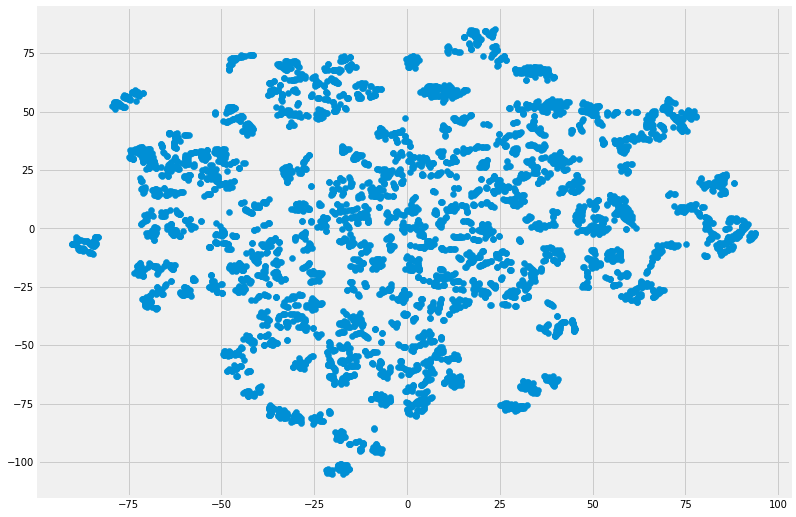

In [144]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

In [145]:
kmeans = KMeans(n_clusters=2, max_iter=100, random_state=2)

In [146]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [147]:
cluster_test = kmeans.predict(X_test)
cluster_train = kmeans.predict(X_target)
cluster_test.shape, cluster_train.shape

((9456,), (5000,))

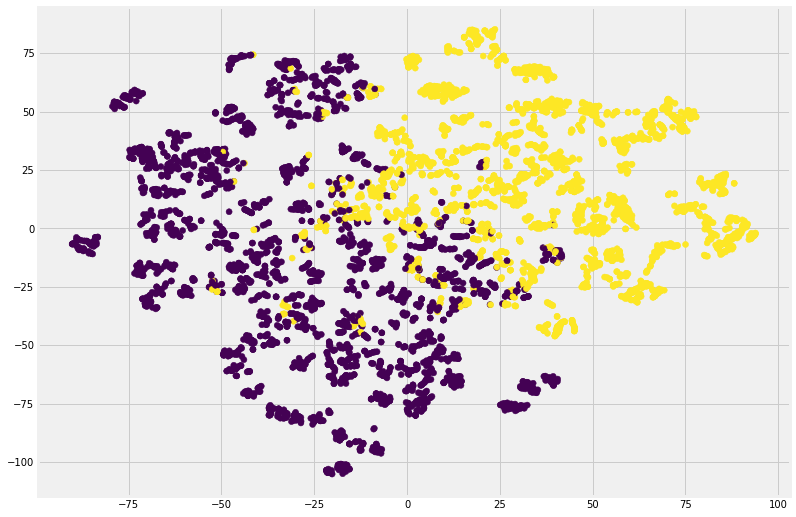

In [148]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

Приемлемая кластеризация

Запишем в датафрейм номера кластеров

In [149]:
data['Cluster'] = cluster_test
data_pred['Cluster'] = cluster_train

Проверим верность разбиения

In [150]:
data['Cluster'].value_counts()[0]/data.shape[0]

0.5616539763113367

In [151]:
data_pred['Cluster'].value_counts()[0]/data_pred.shape[0]

0.5908

_______________________________________

In [152]:
data.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Cluster
0,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,1,1,33,7976,5,895.831221,0,11,1,184966.930730,0
1,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,1,1,46,10309,1,240.000000,1,16,1,300009.450063,0
2,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,1,1,34,7759,0,229.000000,1,3,1,220925.908524,1
3,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,1,1,23,5735,3,1084.000000,0,5,1,175616.227217,0
4,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,1,1,35,5776,1,2078.000000,2,4,1,150226.531644,0


In [153]:
features_price = ('DistrictId', 'Square','LifeSquare', 'KitchenSquare', 'Floor',
                  'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1',
                   'Social_2','Social_3','Healthcare_1','Shops_1')

In [154]:
target = data['Price']

In [155]:
target.shape

(9456,)

Создадим экземпляры класса для каждого кластера:

In [169]:
data_clust = []    #Данные для обучения
target_clust = []  #Целевая переменная для обучения
scaler_clust = []  #scalerы
rfr_clust = [0,1]     #Регрессии
y_pred_clust = []  #Предсказания
y_test_clust = [0,1]#Данные для получения r2
for i in range(2):
    data_clust.append(data.loc[data['Cluster'] == i,features_price])
    target_clust.append(data.loc[data['Cluster'] == i,'Price'])

Для каждого кластера построим свои модели RandomForestRegressor и найдем ошибку r2 для тестовой 
выборки тренировочного датасета данного кластера

Подробнее расписать времени не хватает

In [172]:
rfr_clust[0] = RandomForestRegressor(n_estimators=2000, max_depth=15, random_state=42 ,min_samples_leaf =2)
rfr_clust[1] = RandomForestRegressor(n_estimators=2000, max_depth=15, random_state=42 ,min_samples_leaf =3)
    
for i in range(2):    
   
    X_train, X_test, y_train, y_test_clust[i]  = train_test_split(data_clust[i], target_clust[i], test_size=0.3, random_state=42)
    X_train.shape, X_test.shape, y_train.shape, y_test.shape
    
    scaler_clust.append(StandardScaler())
    
    X_train_scaled = scaler_clust[i].fit_transform(X_train)
    X_test_scaled = scaler_clust[i].transform(X_test)
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=features_price)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=features_price)
    
    #rfr_clust.append(RandomForestRegressor(n_estimators=1000, max_depth=15, random_state=42 ,min_samples_leaf =4))

    rfr_clust[i].fit(X_train_scaled, y_train)

    y_pred_clust.append(rfr_clust[i].predict(X_test_scaled))

    print(f'for {i} cluster r2 is {r2_score(y_test_clust[i], y_pred_clust[i])}')

for 0 cluster r2 is 0.6993236853770148
for 1 cluster r2 is 0.8220851227924901


Собстренно r2 для тренировочного датасета

In [173]:
r2_score(np.hstack((y_test_clust[0], y_test_clust[1])), np.hstack((y_pred_clust[0], y_pred_clust[1])))

0.7597922576292672

In [159]:
rcParams['figure.figsize'] = 15, 3

<BarContainer object of 13 artists>

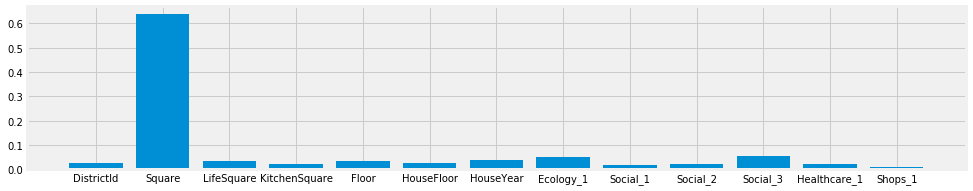

In [160]:
plt.bar(X_train.columns, rfr_clust[0].feature_importances_)

Предсказание цены для весго датасета

In [161]:
for i in range(2):    
   
    X_tr_sc = scaler_clust[i].transform(data.loc[data['Cluster'] == i, features_price])
    
    data.loc[data['Cluster'] == i, 'Clust_price'] = rfr_clust[i].predict(X_tr_sc)

r2 для полного датасета

In [162]:
r2_score(data['Price'], data['Clust_price'])

0.8736534116767318

#### Предсказание цены для тестового датасета с использованием полученных ранее моделей

In [163]:
for i in range(2):    
   
    X_tr_sc = scaler_clust[i].transform(data_pred.loc[data_pred['Cluster'] == i, features_price])
    
    data_pred.loc[data_pred['Cluster'] == i, 'Price'] = rfr_clust[i].predict(X_tr_sc)

In [164]:
data_pred.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Cluster,Price
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,...,1,11,2748,1,629.340000,0,0,1,1,161686.563168
1,15856,74,2.0,69.263183,59.318832,1.0,6,6.0,1977,0.075779,...,1,6,1437,3,1064.290257,0,2,1,1,223590.392133
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,...,1,30,7538,87,4702.000000,5,5,1,0,143867.830233
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,...,1,23,4583,3,2048.862922,3,3,1,0,324669.913591
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,...,1,2,629,1,220.591000,0,0,0,1,144130.949610


In [165]:
data_pred.to_csv('ABakulin_predictions.csv', columns =['Id','Price'], index=False)